In [37]:
using Statistics
using Interpolations

x = zeros((2,4))
x[1,2] = 3
x[1,1] = 4
# print(x)
y = [11,2,3,10,23,42]
y = ones((2,4))
z = y
z .= x .+ y
# ifelse.(x.< 5, x, x.+10)
# print(x[x .>5])
# print(size(x))
# print(size(mean(x[1:2,:], dims=1)))
# mean(filter(!isnan,x), dims=1)
# itp = LinearInterpolation(x, z)
for k in 10:-1:1
    print(k)
end

10987654321

In [47]:
using JLD2


In [169]:
𝚪 = 0.005
a = 6.371E6
b = 2
k = 3
p0 = 100000
Rd = 287
g  = 9.81
T0P = 240
T0E = 310
T0 = (T0E + T0P) * 0.5
H = Rd * T0/g

grid_z_full = zeros(((128,64,20)))
dry_run_file = load("test_final.dat")
grid_z_full .= dry_run_file["grid_z_full_xyzt"][:,:,:,5]

A = 1/𝚪 
B = (T0E - T0P) / (T0E + T0P) / T0P
C = (k+2)/2 * (T0E - T0P) / (T0E * T0P)

τ1 = zeros(((128,64,20)))
τ2 = zeros(((128,64,20)))

τ1 .= A * 𝚪 / T0 .* exp.(𝚪/T0 .* grid_z_full) .+ B .* (1 .- 2 .* (grid_z_full./(b*H)).^2) .* exp.(-1 .* (grid_z_full./(b*H)).^2) 

τ2 .= C .* (1 .- 2 .* (grid_z_full./(b*H)).^2) .* exp.(-1 .* (grid_z_full./(b*H)).^2) 

θc2  = LinRange(-90,90,64)
θc  = deg2rad.(θc2)
for j in 1:64
    grid_t[:,j,:] .= (τ1[:,j,:] .- τ2[:,j,:] .* ((cos(θc[j]))^k - (k/(k+2)) .* (cos(θc[j]))^(k+2))).^-1
end


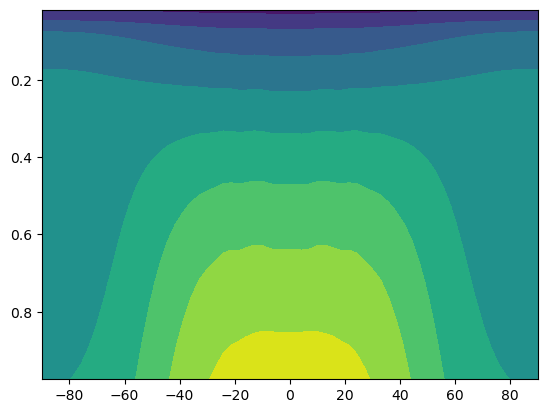

In [180]:
using PyPlot
using Statistics
file = "test_final.dat"
file2 = load(file)
grid_p_full_xyzt = zeros(((128,64,20,5)))
grid_ps_c_xyzt = zeros(((128,64,20,5)))
# sigma = zeros(((128,64,20,5)))
sigma2 = zeros(((64,20)))


        
grid_p_full_xyzt .= file2["grid_p_full_xyzt"][:,:,:,5]
grid_ps_c_xyzt   .= file2["grid_ps_c_xyzt"][:,:,:,5]
sigma = dropdims(mean(grid_p_full_xyzt ./ grid_ps_c_xyzt, dims=(1,2,4)), dims=(1,2,4))
# print(size(sigma))


grid_t_mean = zeros((20,64))
grid_t_mean = dropdims(mean(grid_t, dims=(1)), dims=1)

# Y = LinRange(0,100000,20)
XX = first.(Iterators.product(θc2,sigma))
YY = last.(Iterators.product(θc2,sigma))
# print(size(XX))
# print(size(YY))

# grid_t_mean .= mean(grid_t)
PyPlot.figure()
PyPlot.contourf(XX,YY, grid_t_mean)
PyPlot.gca().invert_yaxis()
# print(grid_t_mean)

(64, 20)(64, 20)

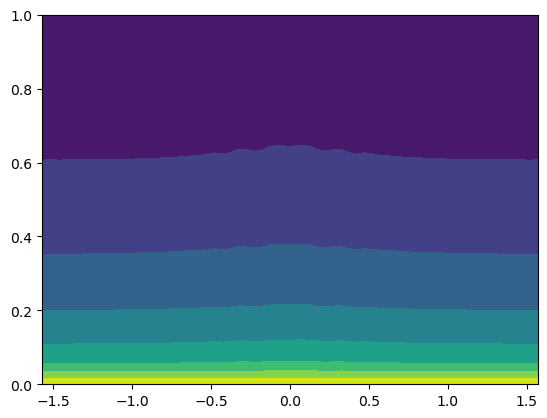

PyObject <matplotlib.contour.QuadContourSet object at 0x7f4d35623940>

In [121]:
grid_z_full_mean = zeros((20,64))
grid_z_full_mean = dropdims(mean(grid_z_full, dims=(1)), dims=1)

Y = LinRange(0,1,20)
XX = first.(Iterators.product(θc,Y))
YY = last.(Iterators.product(θc,Y))
print(size(XX))
print(size(YY))

grid_t_mean .= mean(grid_t)
PyPlot.figure()
PyPlot.contourf(XX,YY, grid_z_full_mean)

In [ ]:
print((x .>1))
print(all(x .>1))
if x .>1 in 5
    x -= 1
end

In [ ]:
if (x.>1)
    print("hi")
end

In [ ]:
using Interpolations
# Data
x = range(-2, 3, length=20)
y = range(3, 4, length=10)
z = @. cos(x) + sin(y')
# Interpolation object (caches coefficients and such)

itp = extrapolate((x, y), z)

print(size(z))

In [ ]:
# random(2)

itp = interpolate([1,3,5], BSpline(Cubic()))
etpf = extrapolate(itp, Linear())   # gives 1 on the left edge and 7 on the right edge
# etp0 = extrapolate(itp, 0)        # gives 0 everywhere outside [1,7]

print((etpf[6]))

In [ ]:
using JLD2
x = LinRange(1,20,20)
y = sin.(x)
itp = interpolate(y, BSpline(Cubic()))
itp2 = interpolate(y, BSpline(Linear()))

v = zeros(20)
v2 = zeros(20)

for i in 1:19
    v[i] = itp[i+0.5]
    v2[i] = itp2[i+0.5]

end
print(size(x))

In [ ]:
using Plots

scatter(x,y)
plot(x,v, label="Cubic")
plot(x,v2, label="Linear")

legend()
show()

In [ ]:
import Dates 

In [ ]:
start_time = Dates.now() 

In [ ]:
final_time = Dates.now() 

In [ ]:
all_time = final_time - start_time

In [ ]:
Dates.canonicalize(Dates.CompoundPeriod(Dates.Millisecond(all_time)))

In [1]:
while ~(isfile("RH80_PR5_50day_startfrom_0day_final.dat"))
    test =  "None" # "0_10day_test_warm_start_all.dat"
end

LoadError: InterruptException:

In [20]:
x = rand(3,2,5)
print(size(x))
print(x[:,:,end])

(3, 2, 5)[0.09108623700692153 0.7323503918676091; 0.09465453150472147 0.00018316652955852053; 0.3650545509740527 0.6388510362544498]